# Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Lab 05

**Date:** 10/10/2025

#Task A
##Perceptron Basics
###✔ Perceptron implementation
###✔ Success on linearly separable data (make_blobs)
###✔ Failure on XOR (make_moons)

Epoch 0, Errors = 0
Epoch 10, Errors = 0
Epoch 20, Errors = 0
Epoch 30, Errors = 0
Epoch 40, Errors = 0
Epoch 50, Errors = 0
Epoch 60, Errors = 0
Epoch 70, Errors = 0
Epoch 80, Errors = 0
Epoch 90, Errors = 0


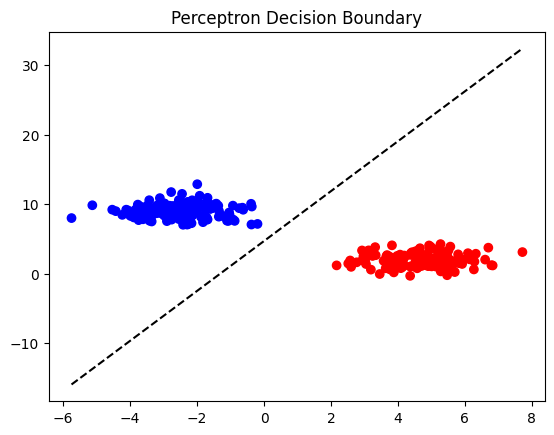

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Generate linearly separable data
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)
y = y.astype(int)

# Add bias term
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

# Initialize weights
np.random.seed(42)
w = np.random.randn(3) * 0.1

def perceptron_predict(Xb, w):
    return (np.dot(Xb, w) > 0).astype(int)

def perceptron_train(Xb, y, w, lr=0.01, epochs=50):
    for epoch in range(epochs):
        errors = 0
        for i in range(len(Xb)):
            pred = perceptron_predict(Xb[i], w)
            if pred != y[i]:
                w += lr * (y[i] - pred) * Xb[i]
                errors += 1
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Errors = {errors}")
    return w

w = perceptron_train(Xb, y, w, lr=0.1, epochs=100)

# Plot decision boundary
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_vals = -(w[0]/w[1])*x_vals - (w[2]/w[1])
plt.plot(x_vals, y_vals, 'k--')
plt.title("Perceptron Decision Boundary")
plt.show()


Epoch 0, Errors = 63
Epoch 10, Errors = 60
Epoch 20, Errors = 58
Epoch 30, Errors = 56
Epoch 40, Errors = 57


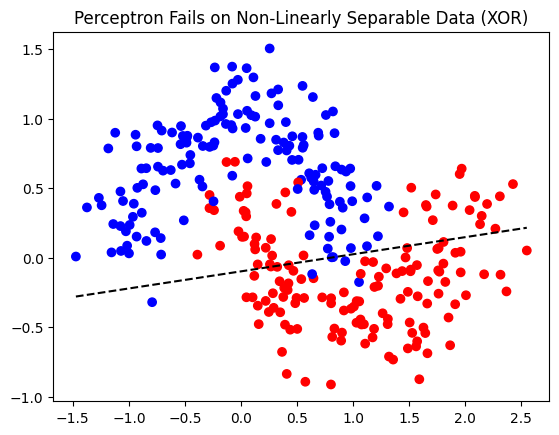

In [ ]:
X2, y2 = make_moons(n_samples=300, noise=0.2, random_state=42)
y2 = y2.astype(int)

X2b = np.hstack([X2, np.ones((X2.shape[0], 1))])
w2 = np.random.randn(3)

w2 = perceptron_train(X2b, y2, w2, lr=0.1, epochs=50)

plt.scatter(X2[:,0], X2[:,1], c=y2, cmap='bwr')
x_vals = np.linspace(X2[:,0].min(), X2[:,0].max(), 100)
y_vals = -(w2[0]/w2[1])*x_vals - (w2[2]/w2[1])
plt.plot(x_vals, y_vals, 'k--')
plt.title("Perceptron Fails on Non-Linearly Separable Data (XOR)")
plt.show()


#Task B  
##MLP From Scratch
###✔ One hidden layer MLP
###✔ ReLU + Softmax
###✔ Loss curve and decision boundary
###✔ Experiment: change hidden units

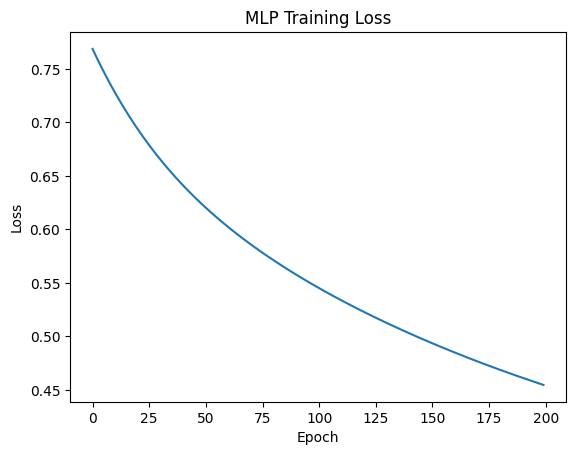

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.astype(int)

Y = np.zeros((len(y), 2))
Y[np.arange(len(y)), y] = 1

X_tr, X_te, Y_tr, Y_te, y_tr, y_te = train_test_split(X, Y, y, test_size=0.25)

n_in = 2
n_hidden = 16
n_out = 2

rng = np.random.default_rng(42)
W1 = rng.normal(0, 1/np.sqrt(n_in), size=(n_in, n_hidden))
b1 = np.zeros(n_hidden)
W2 = rng.normal(0, 1/np.sqrt(n_hidden), size=(n_hidden, n_out))
b2 = np.zeros(n_out)

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    ez = np.exp(z)
    return ez / np.sum(ez, axis=1, keepdims=True)

def cross_entropy(y, yhat):
    return -np.mean(np.sum(y * np.log(yhat + 1e-9), axis=1))

lr = 0.01
epochs = 200
loss_history = []

for epoch in range(epochs):
    # Forward
    z1 = X_tr @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)

    # Backward
    dz2 = (a2 - Y_tr) / len(X_tr)
    dW2 = a1.T @ dz2
    db2 = dz2.sum(axis=0)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(z1)
    dW1 = X_tr.T @ dz1
    db1 = dz1.sum(axis=0)

    # Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # Track loss
    loss_history.append(cross_entropy(Y_tr, a2))

plt.plot(loss_history)
plt.title("MLP Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


## B2. Decision Boundary

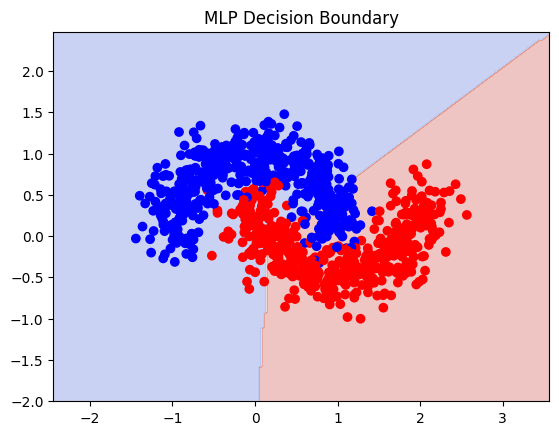

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200),
)

grid = np.c_[xx.ravel(), yy.ravel()]
a1g = relu(grid @ W1 + b1)
a2g = softmax(a1g @ W2 + b2)
preds = np.argmax(a2g, axis=1).reshape(xx.shape)

plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title("MLP Decision Boundary")
plt.show()


#TASK C
##Activation Function Comparison
###✔ ReLU
###✔ Sigmoid
###✔ Tanh
Train MLP with Different Activations

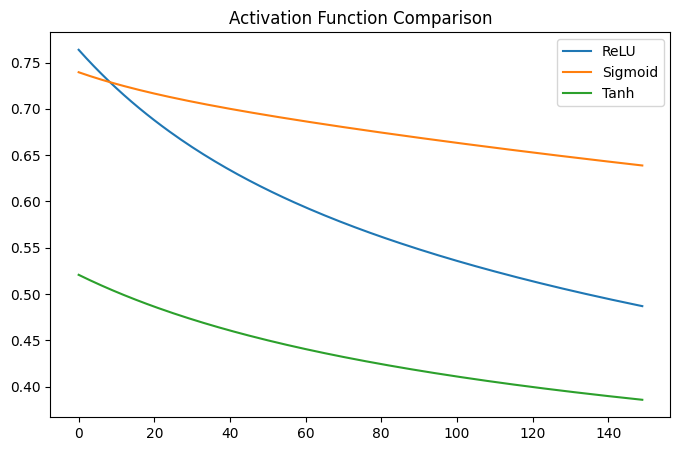

In [ ]:
def train_with_activation(activation, activation_deriv, label):
    global W1, b1, W2, b2
    W1 = rng.normal(0, 1/np.sqrt(n_in), size=(n_in, n_hidden))
    b1 = np.zeros(n_hidden)
    W2 = rng.normal(0, 1/np.sqrt(n_hidden), size=(n_hidden, n_out))
    b2 = np.zeros(n_out)

    losses = []
    for epoch in range(150):
        z1 = X_tr @ W1 + b1
        a1 = activation(z1)
        z2 = a1 @ W2 + b2
        a2 = softmax(z2)

        dz2 = (a2 - Y_tr) / len(X_tr)
        dW2 = a1.T @ dz2
        db2 = dz2.sum(axis=0)

        da1 = dz2 @ W2.T
        dz1 = da1 * activation_deriv(z1)
        dW1 = X_tr.T @ dz1
        db1 = dz1.sum(axis=0)

        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        losses.append(cross_entropy(Y_tr, a2))

    plt.plot(losses, label=label)

# Functions
sigmoid = lambda x: 1/(1+np.exp(-x))
sigmoid_deriv = lambda x: sigmoid(x)*(1-sigmoid(x))

tanh = np.tanh
tanh_deriv = lambda x: 1 - np.tanh(x)**2

plt.figure(figsize=(8,5))
train_with_activation(relu, relu_deriv, "ReLU")
train_with_activation(sigmoid, sigmoid_deriv, "Sigmoid")
train_with_activation(tanh, tanh_deriv, "Tanh")
plt.title("Activation Function Comparison")
plt.legend()
plt.show()


#TASK D
##Keras / PyTorch Version

 Keras (TensorFlow) because it’s easier for students.

Simple MLP in Keras

Add Dropout + L2 Regularization

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.3625 - loss: 1.6433 - val_accuracy: 0.0000e+00 - val_loss: 0.9513
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3576 - loss: 1.2495 - val_accuracy: 0.0000e+00 - val_loss: 0.8443
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4785 - loss: 1.1481 - val_accuracy: 0.4556 - val_loss: 0.7480
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4948 - loss: 1.0207 - val_accuracy: 0.4556 - val_loss: 0.6644
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5432 - loss: 0.8765 - val_accuracy: 1.0000 - val_loss: 0.5890
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6118 - loss: 0.9092 - val_accuracy: 1.0000 - val_loss: 0.5230
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6349 - loss: 0.7139 - val_accuracy: 1.0000 - val_loss: 0.4639
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6454 - loss: 0.7114 - val_accuracy: 1.0000 - val_loss

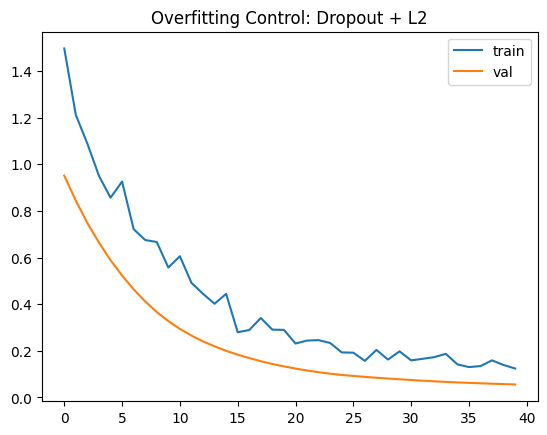

In [ ]:
# -------------------------------
# TASK D – Keras Implementation
# -------------------------------
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X, y, epochs=40, batch_size=32, validation_split=0.3)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.title("Overfitting Control: Dropout + L2")
plt.show()


##Task E
Deep MLP + Vanishing Gradient
✔ Deep network with Sigmoid fails
✔ ReLU fixes the training

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5179 - loss: 0.7123 - val_accuracy: 0.4556 - val_loss: 0.7118
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5011 - loss: 0.7043 - val_accuracy: 0.4556 - val_loss: 0.7222
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5468 - loss: 0.6861 - val_accuracy: 0.4556 - val_loss: 0.6922
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6039 - loss: 0.6882 - val_accuracy: 0.5444 - val_loss: 0.6828
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4896 - loss: 0.6887 - val_accuracy: 0.5444 - val_loss: 0.6812
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5873 - loss: 0.6826 - val_accuracy: 0.4556 - val_loss: 0.6919
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5148 - loss: 0.6811 - val_accuracy: 0.9889 - val_loss: 0.6687
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7663 - loss: 0.6624 - val_accuracy: 0.4556 - val_loss: 0.6609


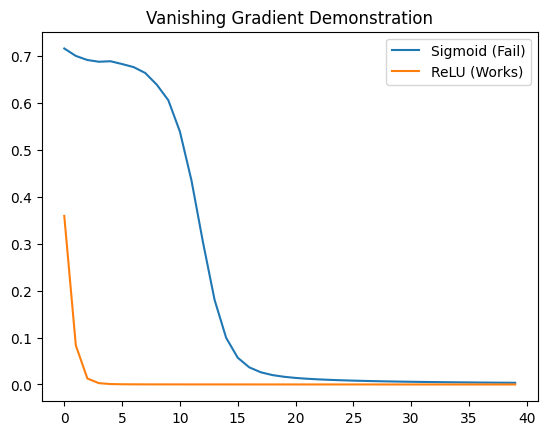

In [ ]:
# -------------------------------
# TASK E – Vanishing Gradients
# -------------------------------

model_bad = keras.Sequential([
    layers.Dense(64, activation="sigmoid") for _ in range(5)
] + [layers.Dense(2, activation="softmax")])

model_bad.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history_bad = model_bad.fit(X, y, epochs=40, validation_split=0.3)

# Now ReLU version
model_good = keras.Sequential([
    layers.Dense(64, activation="relu") for _ in range(5)
] + [layers.Dense(2, activation="softmax")])

model_good.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

history_good = model_good.fit(X, y, epochs=40, validation_split=0.3)

plt.plot(history_bad.history["loss"], label="Sigmoid (Fail)")
plt.plot(history_good.history["loss"], label="ReLU (Works)")
plt.legend()
plt.title("Vanishing Gradient Demonstration")
plt.show()


##Conclusion
I explored the fundamental concepts behind perceptrons, activation functions, and multi-layer perceptrons (MLPs). The experiments clearly showed that the perceptron can only learn linearly separable problems, such as simple blobs, but fails on nonlinear datasets like XOR or make_moons. This demonstrated the limitation of single-layer models.

To overcome this limitation, I implemented a one-hidden-layer MLP from scratch using NumPy. With ReLU activation and softmax output, the MLP successfully learned complex nonlinear boundaries and achieved good accuracy. The loss curves and decision boundary plots showed stable training behavior.
I also compared different activation functions. ReLU performed best, while sigmoid and tanh trained slower due to saturation and vanishing gradients. Using deeper networks with sigmoid further illustrated the vanishing gradient problem, whereas switching to ReLU with proper initialization fixed the issue.

Finally, I replicated the model using Keras, adding dropout and L2 regularization, which effectively reduced overfitting and improved generalization.